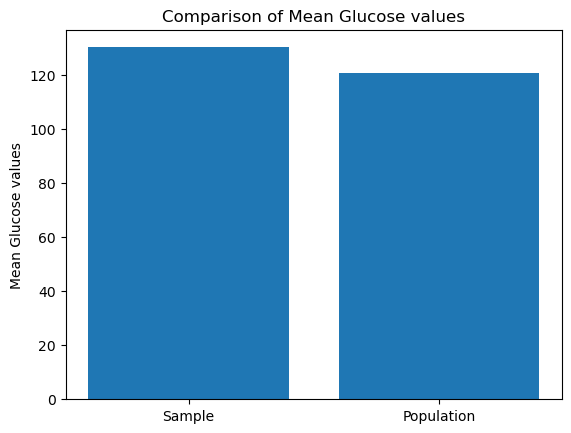

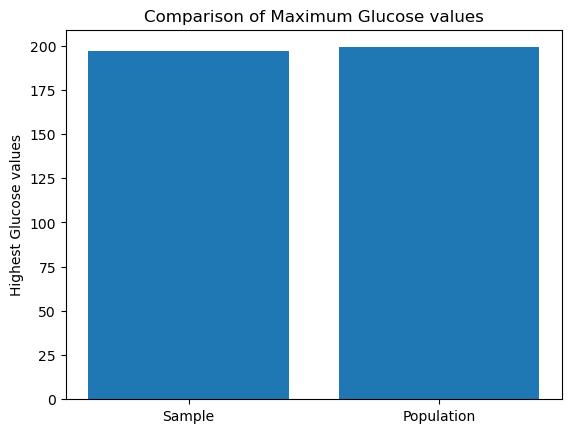

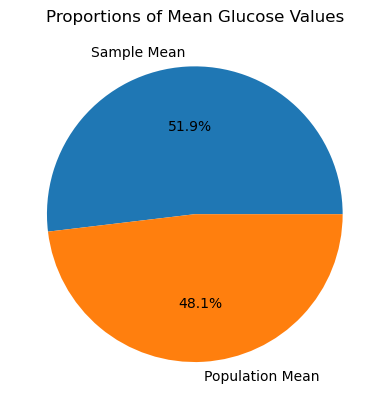

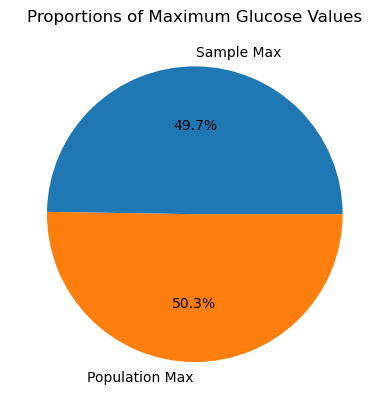

In [10]:
#(a) Set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
#find the mean Glucose and highest Glucose values of this sample and compare these statistics
#with the population statistics of the same variable. You should use charts for this comparison.
#(5 points)

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

np.random.seed(123)
diabetes = pd.read_csv("diabetes.csv")

# Taking a random sample of 25 observations
sample = diabetes.sample(n=25)

sample_mean = sample["Glucose"].mean()
sample_high = sample["Glucose"].max()

population_mean = diabetes["Glucose"].mean()
population_high = diabetes["Glucose"].max()

fig, a = plt.subplots()
a.bar(["Sample", "Population"], [sample_mean, population_mean])
a.set_ylabel("Mean Glucose values")
a.set_title("Comparison of Mean Glucose values")
plt.show()

fig, a = plt.subplots()
a.bar(["Sample", "Population"], [sample_high, population_high])
a.set_ylabel("Highest Glucose values")
a.set_title("Comparison of Maximum Glucose values")
plt.show()

labels = ['Sample Mean', 'Population Mean']
sizes = [sample_mean, population_mean]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Proportions of Mean Glucose Values')
plt.show()

labels = ['Sample Max', 'Population Max']
sizes = [sample_max, population_high]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Proportions of Maximum Glucose Values')
plt.show()


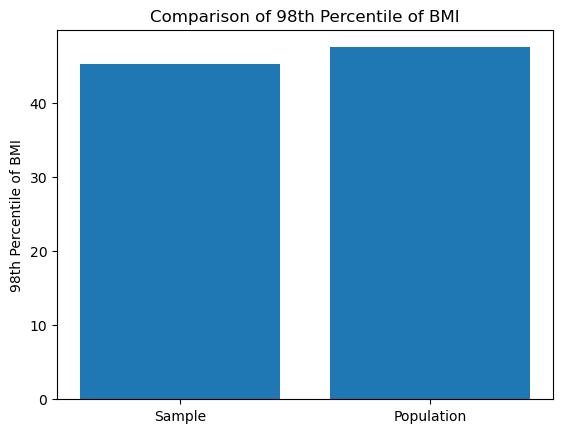

In [6]:
#(b) Find the 98th percentile of BMI of your sample and the population and compare the results
#using charts. (5 points)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

diabetes = pd.read_csv("diabetes.csv")

sample = diabetes.sample(n=25)

sample1= np.percentile(sample["BMI"], 98)
population1 = np.percentile(diabetes["BMI"], 98)

fig, a = plt.subplots()
a.bar(["Sample", "Population"], [sample1, population1])
a.set_ylabel("98th Percentile of BMI")
a.set_title("Comparison of 98th Percentile of BMI")
plt.show()



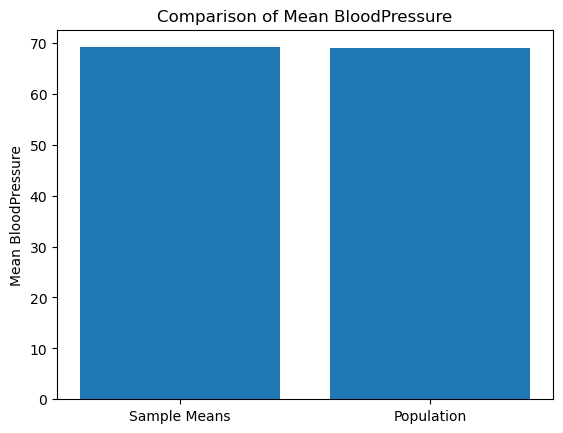

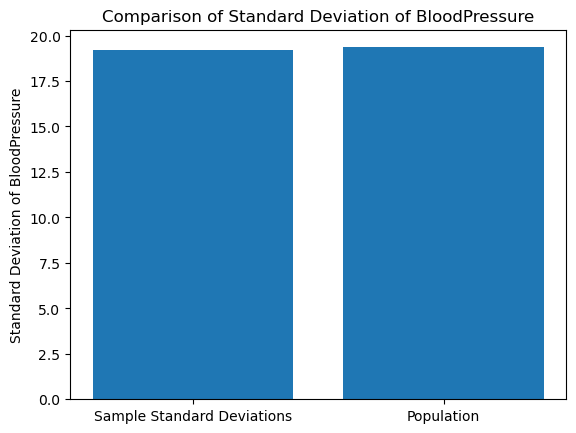

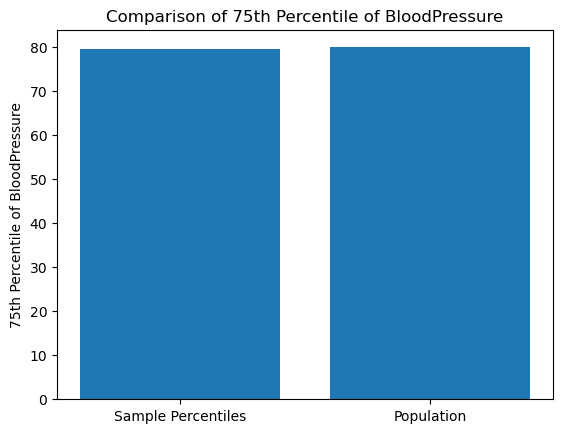

In [13]:
#(c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
#population and find the average mean, standard deviation and percentile for BloodPressure and
#compare this with these statistics from the population for the same variable. Again, you should
#create charts for this comparison. Report on your findings. (10 points)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

diabetes = pd.read_csv("diabetes.csv")

def bootstrap_sample(data, n=150):
    return data.sample(n=n, replace=True)

n_samples = 500
sample_means = []
sample_std_devs = []
sample_percentiles = []
for i in range(n_samples):
    sample = bootstrap_sample(diabetes["BloodPressure"])
    sample_mean = sample.mean()
    sample_std_dev = sample.std()
    sample_percentile = np.percentile(sample, 75)
    sample_means.append(sample_mean)
    sample_std_devs.append(sample_std_dev)
    sample_percentiles.append(sample_percentile)

population_mean = diabetes["BloodPressure"].mean()
population_std_dev = diabetes["BloodPressure"].std()
population_percentile = np.percentile(diabetes["BloodPressure"], 75)

fig, ax = plt.subplots()
ax.bar(["Sample Means", "Population"], [np.mean(sample_means), population_mean])
ax.set_ylabel("Mean BloodPressure")
ax.set_title("Comparison of Mean BloodPressure")
plt.show()

fig, ax = plt.subplots()
ax.bar(["Sample Standard Deviations", "Population"], [np.mean(sample_std_devs), population_std_dev])
ax.set_ylabel("Standard Deviation of BloodPressure")
ax.set_title("Comparison of Standard Deviation of BloodPressure")
plt.show()

fig, ax = plt.subplots()
ax.bar(["Sample Percentiles", "Population"], [np.mean(sample_percentiles), population_percentile])
ax.set_ylabel("75th Percentile of BloodPressure")
ax.set_title("Comparison of 75th Percentile of BloodPressure")
plt.show()


